In [2]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 

In [63]:
df_iris = pd.read_csv('iris_teach_2.csv')
df_iris.dropna(inplace=True)
df_iris = df_iris.drop(columns=['petal width (cm)'])
X = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
y = df_iris['iris_name']
label_encoder = LabelEncoder()
label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)


X_train:      sepal length (cm)  sepal width (cm)  petal length (cm)
22                 4.6               3.6                1.0
15                 5.7               4.4                1.5
68                 6.7               3.1                4.4
11                 4.8               3.4                1.6
44                 4.4               3.2                1.3
..                 ...               ...                ...
74                 6.1               2.8                4.0
109                4.9               2.5                4.5
14                 5.8               4.0                1.2
95                 5.8               2.6                4.0
105                7.1               3.0                5.9

[120 rows x 3 columns]
X_test:      sepal length (cm)  sepal width (cm)  petal length (cm)
76                 6.1               2.8                4.7
18                 5.7               3.8                1.7
121                7.7               2.6                6.9

Accuracy: 0.93


[Text(0.4444444444444444, 0.9545454545454546, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.3333333333333333, 0.8636363636363636, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5555555555555556, 0.8636363636363636, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.3333333333333333, 0.7727272727272727, 'x[0] <= 4.95\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.2222222222222222, 0.6818181818181818, 'x[2] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.5909090909090909, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.5909090909090909, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.6818181818181818, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.7777777777777778, 0.7727272727272727, 'x[2] <= 5.15\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.6666666666666666, 0.6818181818181818,

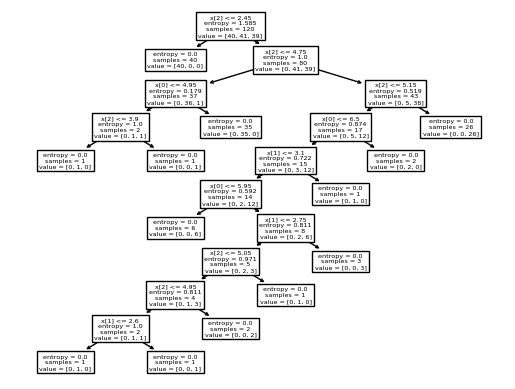

In [64]:
# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(X_train, y_train)

# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

plot_tree(tree_clf)

Best hyperparameters: {'max_depth': 4}


[Text(0.4444444444444444, 0.9, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.2222222222222222, 0.3, 'x[2] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.7777777777777778, 0.5, 'x[2] <= 5.15\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 6.5\nentropy = 0.874\nsamples = 17\nvalue = [0, 5, 12]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.722\nsamples = 15\nvalue = [0, 3, 12]'

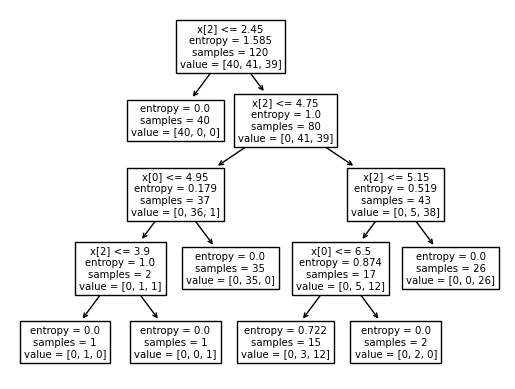

In [66]:
# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)
plot_tree(tree_clf_tuned)